In [1]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc



In [ ]:
# =========================
# 2. LOAD DATA
# =========================
from dotenv import load_dotenv
import os
load_dotenv()
data_path = os.getenv("PATH")
df = pd.read_csv(data_path, index_col="PassengerId")

In [3]:

# =========================
# 3. HANDLE MISSING VALUES
# =========================
df["Age"].fillna(df["Age"].mean(), inplace=True)

df["Fare"] = pd.to_numeric(df["Fare"], errors="coerce")
df["Fare"].fillna(df["Fare"].median(), inplace=True)

df["Sex"].fillna(df["Sex"].mode()[0], inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

df["Deck"] = df["Cabin"].str[0]
df["Deck"].fillna("Missing", inplace=True)
df.drop(columns=["Cabin"], inplace=True)

df.dropna(subset=["Ticket"], inplace=True)



C:\Users\NINAD\AppData\Local\Temp\ipykernel_24668\3024254455.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\NINAD\AppData\Local\Temp\ipykernel_24668\3024254455.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:

# =========================
# 4. ENCODING
# =========================
df_copy = df.copy()

le = LabelEncoder()
df_copy["Sex_encoded"] = le.fit_transform(df_copy["Sex"])
df_copy.drop(columns=["Sex"], inplace=True)

df_copy = pd.get_dummies(df_copy, columns=["Embarked"], drop_first=True)

bool_cols = df_copy.select_dtypes(include="bool").columns
df_copy[bool_cols] = df_copy[bool_cols].astype(int)



In [ ]:

# =========================
# 5. DROP STRING COLUMNS
# =========================
df_copy.drop(columns=["Name", "Ticket"], inplace=True)

# Converting to numeric types from object 
df_copy["Pclass"] = pd.to_numeric(df_copy["Pclass"], errors="coerce")
df_copy["Parch"] = pd.to_numeric(df_copy["Parch"], errors="coerce")


In [11]:

# =========================
# 6. DEFINE FEATURES & TARGET
# =========================
X = df_copy[
    ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_encoded", "Embarked_Q", "Embarked_S"]
]
y = df_copy["Survived"]

X = X.dropna()
y = y.loc[X.index]



In [12]:

# =========================
# 7. TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [13]:

# =========================
# 8. FEATURE SCALING (MANDATORY)
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [14]:

# =========================
# 9. TRAIN SVM
# =========================
svm_model = SVC(
    kernel="rbf",       # nonlinear decision boundary
    C=1.0,              # regularization strength
    gamma="scale",      # kernel influence
    probability=True,   # needed for ROC curve
    random_state=42
)

svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:


# =========================
# 10. PREDICTIONS
# =========================
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]



In [16]:

# =========================
# 11. METRICS
# =========================
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))



Accuracy : 0.8212290502793296
F1 Score : 0.7647058823529411
Precision: 0.8387096774193549
Recall   : 0.7027027027027027


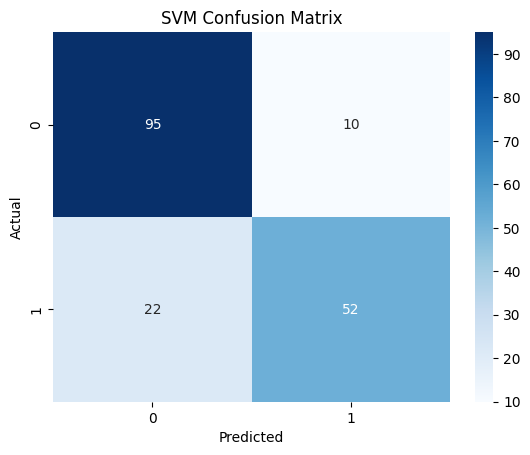

In [17]:

# =========================
# 12. CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



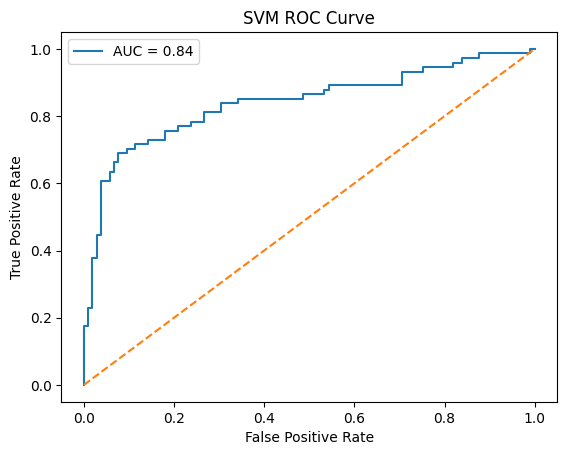

In [18]:

# =========================
# 13. ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()
